In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as mplstyle
%matplotlib inline
mplstyle.use('ggplot')

# Titanic Competition

The Kaggle competiton is here: [Titanic](https://www.kaggle.com/c/titanic)

## Read in the data

In [2]:
df = pd.read_csv('data/train.csv')

# Wrangling

In [3]:
df['Sex'] = df['Sex'].astype('category')

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Distribution of fares

The histogram below shows us that the bulk of passengers paid less than \$100 to board the Titanic. Even then the bulk paid less than $30.

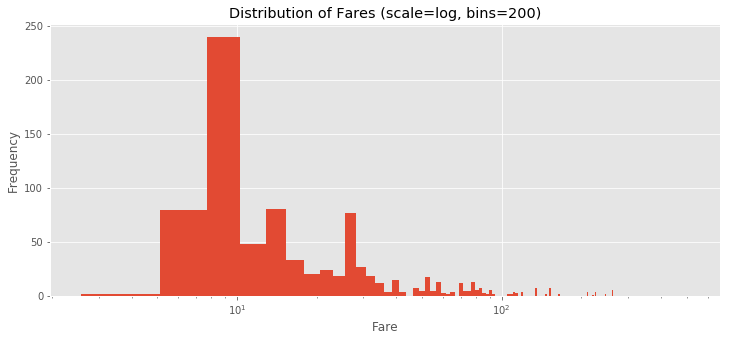

In [5]:
b = 200  # bins

fig, ax = plt.subplots(figsize=(12,5))
df['Fare'].hist(bins=b, ax=ax)
ax.set_title(f'Distribution of Fares (scale=log, bins={b})')
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
ax.set_xscale('log')

### Suvival by fare

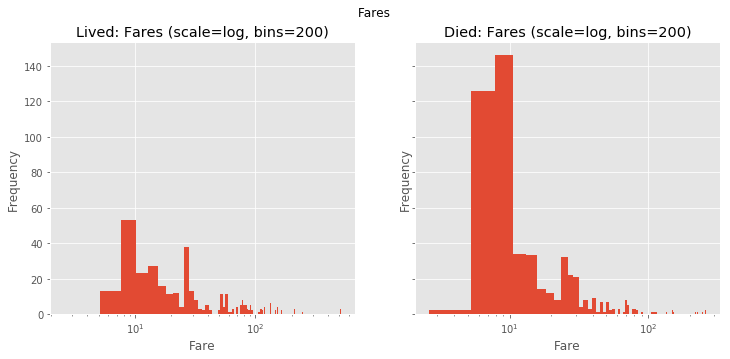

In [6]:
lived = df[df['Survived'] == 1].copy()
died = df[df['Survived'] == 0].copy()
    
b = 200  # bins

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
fig.suptitle('Fares')
lived['Fare'].hist(bins=b, ax=ax1)
ax1.set_title(f'Lived: Fares (scale=log, bins={b})')
died['Fare'].hist(bins=100, ax=ax2)
ax2.set_title(f'Died: Fares (scale=log, bins={b})')

for i in (ax1, ax2):
    i.set_ylabel('Frequency')
    i.set_xlabel('Fare')
    i.set_xscale('log')

In [7]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Distribution of ages

Text(0,0.5,'Frequency')

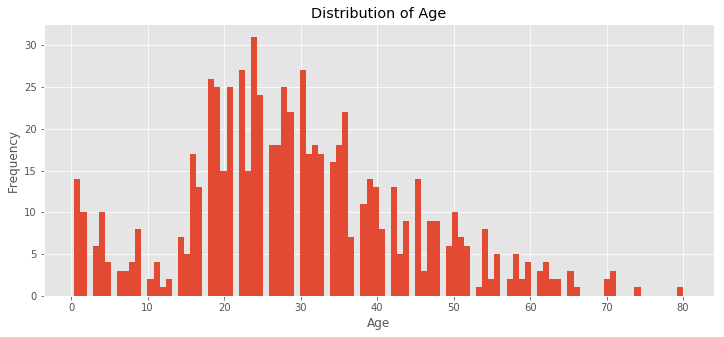

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
df['Age'].hist(bins=100, ax=ax)
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Survival by age

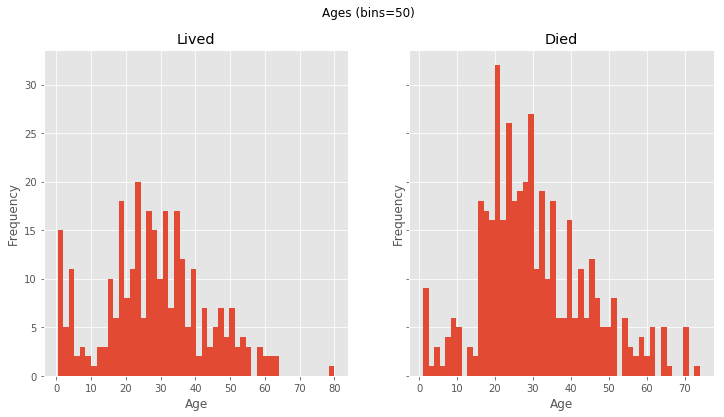

In [10]:
b = 50  # bins

lived = df[df['Survived'] == 1].copy()
died = df[df['Survived'] == 0].copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=True)
fig.suptitle(f'Ages (bins={b})')
lived['Age'].hist(bins=b, ax=ax1)
ax1.set_title('Lived')
died['Age'].hist(bins=b, ax=ax2)
ax2.set_title('Died')
for i in (ax1, ax2):
    i.set_xlabel('Age')
    i.set_ylabel('Frequency')

## Survival by sex

In [11]:
g = df.groupby(['Sex', 'Survived'])
g.size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


## Exploration

In [12]:
g = lived.groupby(['Sex'])
g.size()

Sex
female    233
male      109
dtype: int64

In [13]:
h = died.groupby(['Sex'])
h.size()

Sex
female     81
male      468
dtype: int64

In [14]:
died.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


# Feature engineering

I'd like to do this:

$$
NewFeature = Normalize(Fare) + Sex
$$

I'm going to use the SciKit Learn `StandardScaler` for this. I don' know why it has to have an index column. Why can't it just take a 1d array?

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
# StandardScaler takes 2d arrays, not 1d

rdata = df[['Fare']].values
ix = np.arange(len(data))

data = []

for i, j in zip(ix, rdata):
    data.append([i, j[0]])

data = np.array(data)
data[:10]

array([[  0.    ,   7.25  ],
       [  1.    ,  71.2833],
       [  2.    ,   7.925 ],
       [  3.    ,  53.1   ],
       [  4.    ,   8.05  ],
       [  5.    ,   8.4583],
       [  6.    ,  51.8625],
       [  7.    ,  21.075 ],
       [  8.    ,  11.1333],
       [  9.    ,  30.0708]])

In [80]:
std_fare = scaler.fit(data)

In [81]:
type(std_fare)

sklearn.preprocessing.data.StandardScaler

In [82]:
foo = scaler.transform(data)

In [83]:
x = df['Sex'].values.codes
y = foo.T[1]
z = df['Survived'].values

for i in zip(x[:5], y[:5], z[:5]):
    print(i)

(1, -0.5024451714361915, 0)
(0, 0.78684529358844668, 1)
(0, -0.48885425758524781, 1)
(0, 0.4207302360686484, 1)
(1, -0.4863374216869249, 0)


In [89]:
new_feature = [i*10 + j for i, j in zip(x,y)]
new_feature = np.array(new_feature)

In [90]:
new_feature[:10]

array([  9.49755483,   0.78684529,  -0.48885426,   0.42073024,
         9.51366258,   9.52188357,  10.39581356,   9.77591688,
        -0.42425614,  -0.0429555 ])

In [91]:
sex = df['Sex'].head().copy()
for i in range(5):
    print(sex.values[i], sex.values.codes[i], z[i])

male 1 0
female 0 1
female 0 1
female 0 1
male 1 0


# Scatterplot

In [27]:
survival_colors = ['r', 'b']
colors = pd.Categorical.from_codes(z, survival_colors)
colors[:5]

[r, b, b, b, r]
Categories (2, object): [r, b]

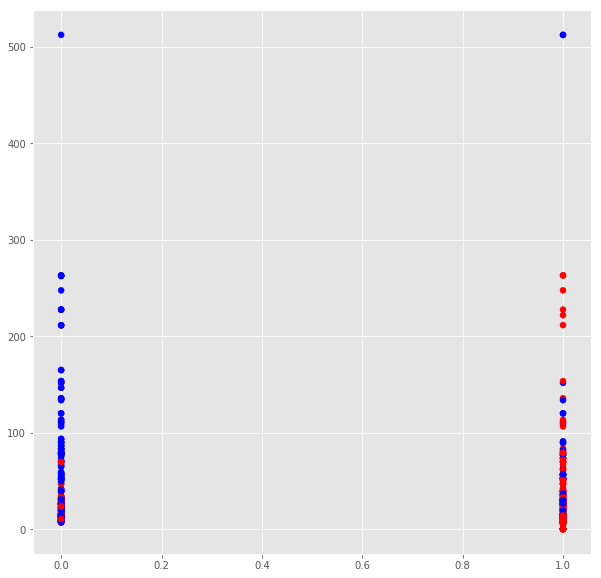

In [29]:
fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x, y, c=colors)

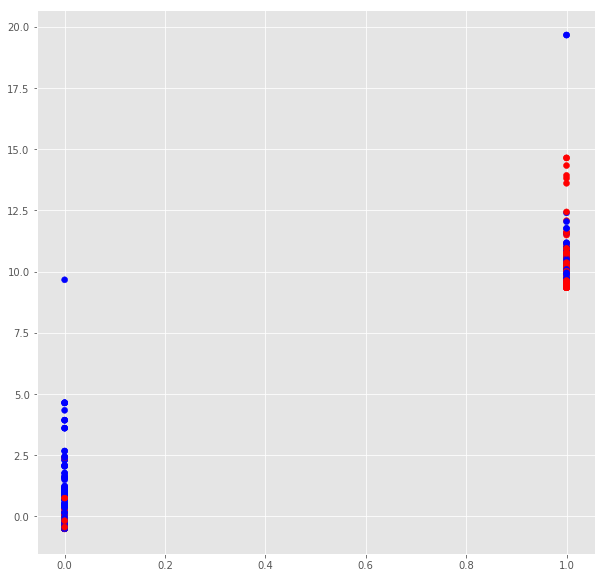

In [92]:
fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x, new_feature, c=colors)

# First answer

In [93]:
def answer(x):
    if float(x) > 7.5:
        return 1
    return 0

In [95]:
len(df['PassengerId'].index)

891

To be continued...

# Appendix A: Columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB
